# 웹 크롤링1 - Static Crawling

# urllib
- 파이썬은 웹 사이트에 있는 데이터를 추출하기 위해 urllib 라이브러리 사용
- 이를 이용해 HTTP 또는 FTP를 사용해 데이터 다운로드 가능
- urllib은 URL을 다루는 모듈을 모아 놓은 패키지
- urllib.request 모듈은 웹 사이트에 있는 데이터에 접근하는 기능 제공, 또한 인증, 리다렉트, 쿠키처럼 인터넷을 이용한 다양한 요청과 처리가 가능

In [26]:
from urllib import request

## urllib.request를 이용한 다운로드
- urllib.request 모듈에 있는 urlretrieve() 함수 이용
- 다음의 코드는 PNG 파일을 test.png 라는 이름의 파일로 저장하는 예제임

In [27]:
# 라이브러리 읽어들이기
from urllib import request

url = "http://uta.pw/shodou/img/28/214.png"
savename = "test.png"

request.urlretrieve(url, savename)  # urlretrieve 함수로 저장해준다.
print("저장되었습니다")

저장되었습니다


## urlopen으로 파일에 저장하는 방법
- request.urlopen()은 메모리에 데이터를 올린 후 파일에 저장하게 된다.

In [28]:
# URL과 저장경로 지정하기
url = "http://uta.pw/shodou/img/28/214.png"
savename = "test1.png"
# 다운로드
mem = request.urlopen(url).read()
# 파일로 저장하기, wb는 쓰기와 바이너리모드
with open(savename, mode="wb") as f:
    f.write(mem)
    print("저장되었습니다..")

저장되었습니다..


## API 사용하기

### 클라이언트 접속 정보 출력 (기본)
- API는 사용자의 요청에 따라 정보를 반환하는 프로그램
- IP 주소, UserAgent 등 클라이언트 접속정보 출력하는 "IP 확인 API" 접근해서 정보를 추출하는 프로그램

In [29]:
# 데이터 읽어들이기
url = "http://api.aoikujira.com/ip/ini"
res = request.urlopen(url)
data = res.read()

# 바이너리를 문자열로 변환하기
text = data.decode("utf-8")
print(text)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=14.47.163.36
REMOTE_HOST=14.47.163.36
REMOTE_PORT=39098
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.8
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini




# BeautifulSoup
- 스크레이핑(Scraping or Crawling)이란 웹 사이트에서 데이터를 추출하고, 원하는 정보를 추출하는 것을 의미
- BeautifulSoup란 파이썬으로 스크레이핑할 때 사용되는 라이브러리로서 HTML/XML에서 정보를 추출할 수 있도록 도와줌. 그러나 다운로드 기능은 없음.
- 파이썬 라이브러리는 pip 명령어를 이용해 설치 가능. Python Package Index(PyPI)에 있는 패키지 명령어를 한줄로 설치 가능
    - URL (http://pypi.python.org/pypi)
    
  pip install beautifulsoup4
  
- 예제 HTML
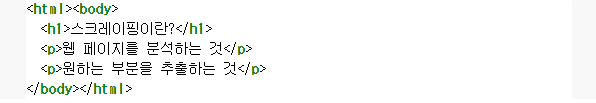

### 패키지 import 및 예제 HTML

In [30]:
from bs4 import BeautifulSoup

In [31]:
from bs4 import BeautifulSoup
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""

## 기본 사용 
- 다음은 Beautifulsoup를 이용하여 웹사이트로부터 HTML을 가져와 문자열로 만들어 이용하는 예제임
- h1 태그를 접근하기 위해 html-body-h1 구조를 사용하여 soup.html.body.h1 이런식으로 이용하게 됨.
- p 태그는 두개가 있어 soup.html.body.p 한 후 next_sibling을 두번 이용하여 다음 p를 추출. 한번만 하면 그 다음 공백이 추출됨.
- HTML 태그가 복잡한 경우 이런 방식으로 계속 진행하기는 적합하지 않음.

### HTML 분석하기

In [32]:
soup = BeautifulSoup(html, 'html.parser')

### 원하는 부분 추출하기

In [33]:
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling  # next_sibling을 이용하면 그 다음 태그에 접근이 가능하다.

### 요소의 글자 출력하기

In [34]:
print(f"h1 = {h1.string}")
print(f"p  = {p1.string}")
print(f"p  = {p2.string}")

h1 = 스크레이핑이란?
p  = 웹 페이지를 분석하는 것
p  = 원하는 부분을 추출하는 것


## 요소를 찾는 method
### 단일 element 추출: find()

BeautifulSoup는 루트부터 하나하나 요소를 찾는 방법 말고도 find()라는 메소드를 제공함.

In [35]:
soup = BeautifulSoup(html, 'html.parser')

- find() 메서드로 원하는 부분 추출하기

In [37]:
title = soup.find("h1")
body = soup.find("p") # p 태그 중 가장 위에 있는 태그를 찾는 것이다. 다른거 찾는거는 위에 sibling이 있다.
print(title)
print(body) 

<h1>스크레이핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>


- 텍스트 부분 출력하기

In [38]:
print(f"#title = {title.string}" )
print(f"#body = {body.string}")

#title = 스크레이핑이란?
#body = 웹 페이지를 분석하는 것


### 복수 elements 추출: find_all()

여러개의 태그를 한번에 추출하고자 할때 사용함. 다음의 예제에서는 여러개의 태그를 추출하는 법을 보여주고 있음

In [39]:
html = """
<html><body>
  <ul>
    <li><a href="http://www.naver.com">naver</a></li>
    <li><a href="http://www.daum.net">daum</a></li>
  </ul>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')

- find_all() 메서드로 추출하기

In [40]:
links = soup.find_all("a")
print(links, len(links))

[<a href="http://www.naver.com">naver</a>, <a href="http://www.daum.net">daum</a>] 2


- 링크 목록 출력하기

In [41]:
for a in links:
    href = a.attrs['href'] # href의 속성에 있는 속성값을 추출
    text = a.string 
    print(text, ">", href)

naver > http://www.naver.com
daum > http://www.daum.net


# Css Selector

Css Selector란, 웹상의 요소에 css를 적용하기 위한 문법으로, 즉 요소를 선택하기 위한 패턴입니다.

출처: https://www.w3schools.com/cssref/css_selectors.asp

앞서 간단하게 태그를 사용하여 데이터를 추출하는 방법에 대해서 살펴보았습니다.

하지만 복잡하게 구조화된 웹 사이트에서 자신이 원하는 데이터를 가져오기 위해서는 Css Selector에 대한 이해가 필요합니다.
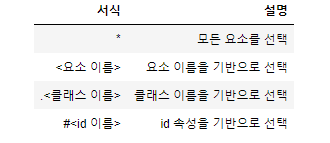

## BeautifulSoup에서 Css Selector 사용하기
BeautifulSoup에서는 Css Selector로 값을 가져올 수 있도록 find와는 다른 다음과 같은 메서드를 제공합니다.
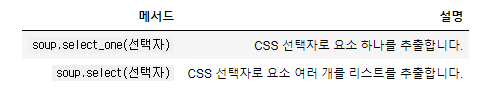

In [43]:
html = """
<html><body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body></html>
"""

# HTML 분석하기 
soup = BeautifulSoup(html, 'html.parser') # BeautifulSoup 함수는 ,'html.parser'를 인수로 가질 때, html을 분석해준다.

- 필요한 부분을 CSS 쿼리로 추출하기

In [44]:
# 타이틀 부분 추출하기 --- (※3)
h1 = soup.select_one("div#meigen > h1").string # selctone으로 요소 하나를 추출
print(f"h1 = {h1}")

# 목록 부분 추출하기 --- (※4)
li_list = soup.select("div#meigen > ul.items > li") #은 아이디를 선택할 때 쓴다.
for li in li_list:
  print(f"li = {li.string}")

h1 = 위키북스 도서
li = 유니티 게임 이펙트 입문
li = 스위프트로 시작하는 아이폰 앱 개발 교과서
li = 모던 웹사이트 디자인의 정석


# 활용 예제

앞서 배운 urllib과 BeautifulSoup를 조합하면, 웹스크레이핑 및 API 요청 작업을 쉽게 수행하실 수 있습니다.

1. URL을 이용하여 웹으로부터 html을 읽어들임 (urllib) html 분석 및 원하는 데이터를 추출 (BeautifulSoup)
2. html 분석 및 원하는 데이터를 추출 (BeautifulSoup)

In [3]:
from bs4 import BeautifulSoup
from urllib import request, parse

## 네이버 금융 - 환율 정보
- 다양한 금융 정보가 공개돼 있는 "네이버 금융"에서 원/달러 환율 정보를 추출해보자!
- 네이버 금융의 시장 지표 페이지 https://finance.naver.com/marketindex/
- 다음은 원/달러 환율 정보를 추출하는 프로그램임

### HTML 가져오기

In [4]:
url = "https://finance.naver.com/marketindex/"
res = request.urlopen(url)

## HTML 분석하기

In [5]:
soup = BeautifulSoup(res, "html.parser")

In [6]:
price = soup.select_one("div.head_info > span.value").string # selector로 원달러 정보를 가져온다.
print("usd/krw =", price) 

usd/krw = 1,163.20


# 기상청 RSS
- 기상청 RSS에서 특정 내용을 추출하는 예제
- 기상청 RSS에서 XML 데이터를 추출하고 XML 내용을 출력
- 기상청의 RSS 서비스에 지역 번호를 지정하여 데이터 요청해보기 
 
 http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp
    - 참고: 기상청 RSS http://www.kma.go.kr/weather/lifenindustry/service_rss.jsp

### HTML 가져오기

In [8]:
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

#매개변수를 URL로 인코딩한다.
values = {
    'stnId':'109' # 서울 경기도 지역의 날씨를 가져온다.
}

params=parse.urlencode(values)
url += "?"+params # URL에 매개변수 추가
print("url=", url)

res = request.urlopen(url)

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109


### HTML 분석하기

In [9]:
soup = BeautifulSoup(res, "html.parser")

### 원하는 데이터 추출하기

In [13]:
header = soup.find("header")

title = header.find("title").text # TITLE 태그를 찾고 그 안에 들어 있는 text를 불러온다.
wf = header.find("wf").text # wf 태그 중 맨 처음 것을 가져온다.

print(title)
print(wf)

서울,경기도 육상중기예보
○ (기온) 이번 예보기간 낮 기온은 22~25도로 오늘(23일, 22~25도)과 비슷하겠고, 아침 기온은 11~17도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 낮과 밤의 기온차가 10도 내외로 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.<br />○ (주말전망) 26일(토)은 오전에 구름많다가 오후에 대체로 맑겠고, 27일(일)은 맑겠습니다. 아침 최저기온은 11~16도, 낮 최고기온은 23~25도가 되겠습니다.


- css selector 기반

In [31]:
title = soup.select_one("header > title").text
wf = soup.select_one("header > wf").text

print(title)
print(wf)

서울,경기도 육상중기예보
○ (기온) 이번 예보기간 낮 기온은 22~25도로 오늘(23일, 22~25도)과 비슷하겠고, 아침 기온은 11~17도로 선선하겠습니다.<br />          특히, 내륙을 중심으로 낮과 밤의 기온차가 10도 내외로 크겠습니다.<br />○ (해상) 서해중부해상의 물결은 0.5~2.0m로 일겠습니다.<br />○ (주말전망) 26일(토)은 오전에 구름많다가 오후에 대체로 맑겠고, 27일(일)은 맑겠습니다. 아침 최저기온은 11~16도, 낮 최고기온은 23~25도가 되겠습니다.


## 윤동주 작가의 작품 목록

- 위키문헌 (https://ko.wikisource.org/wiki) 에 공개되어 있는 윤동주의 작품목록을 가져오기
- 윤동주 위키(https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC)
- 하늘과 바람과 시 부분을 선택한 후 오른쪽 마우스 이용해 copy selector로 카피하면 다음의 CSS 선택자가 카피됨
    - #mw-content-text > div > ul:nth-child(6) > li > b > a
- nth-child(n) 은 n 번째 요소를 의미 즉 6번째 요소를 의미, #mw-content-text 내부에 있는 url 태그는 모두 작품과 관련된 태그. 따라서 따로 구분할 필요는 없으며 생략해도 됨. BeautifulSoup는 nth-child 지원하지 않음

In [34]:
# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.

url = "https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC"
res = request.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는 
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.
a_list = soup.select("#mw-content-text   ul > li  a")
for a in a_list:
    name = a.string
    print(f"- {name}", )

- 하늘과 바람과 별과 시
- 증보판
- 서시
- 자화상
- 소년
- 눈 오는 지도
- 돌아와 보는 밤
- 병원
- 새로운 길
- 간판 없는 거리
- 태초의 아침
- 또 태초의 아침
- 새벽이 올 때까지
- 무서운 시간
- 십자가
- 바람이 불어
- 슬픈 족속
- 눈감고 간다
- 또 다른 고향
- 길
- 별 헤는 밤
- 흰 그림자
- 사랑스런 추억
- 흐르는 거리
- 쉽게 씌어진 시
- 봄
- 참회록
- 간(肝)
- 위로
- 팔복
- 못자는밤
- 달같이
- 고추밭
- 아우의 인상화
- 사랑의 전당
- 이적
- 비오는 밤
- 산골물
- 유언
- 창
- 바다
- 비로봉
- 산협의 오후
- 명상
- 소낙비
- 한난계
- 풍경
- 달밤
- 장
- 밤
- 황혼이 바다가 되어
- 아침
- 빨래
- 꿈은 깨어지고
- 산림
- 이런날
- 산상
- 양지쪽
- 닭
- 가슴 1
- 가슴 2
- 비둘기
- 황혼
- 남쪽 하늘
- 창공
- 거리에서
- 삶과 죽음
- 초한대
- 산울림
- 해바라기 얼굴
- 귀뚜라미와 나와
- 애기의 새벽
- 햇빛·바람
- 반디불
- 둘 다
- 거짓부리
- 눈
- 참새
- 버선본
- 편지
- 봄
- 무얼 먹구 사나
- 굴뚝
- 햇비
- 빗자루
- 기왓장 내외
- 오줌싸개 지도
- 병아리
- 조개껍질
- 겨울
- 트루게네프의 언덕
- 달을 쏘다
- 별똥 떨어진 데
- 화원에 꽃이 핀다
- 종시


# 일반문제

## 네이버 뉴스 헤드라인 
배운 내용을 바탕으로 네이버 뉴스(https://news.naver.com/)에서 헤드라인 뉴스의 제목을 추출해보고자 합니다.
- Q: 다음의 코드에 css selector를 추가하여 최신 기사의 헤드라인을 스크레이핑하는 코드를 완성하시오.

In [53]:
import requests
from bs4 import BeautifulSoup

url = "https://news.naver.com/"
r = requests.get(url) # urlopen으로 할 경우에 네이버 정책으로 인해 500 에러가 발생해 이렇게 코드를 작성하였습니다.
soup = BeautifulSoup(r.text, 'html.parser')

selector = "#today_main_news > div.hdline_news > ul > li > div.hdline_article_tit > a"

for a in soup.select(selector):
    title = a.text
    print(title)


                                        "정치공세…난 희생양" 주장 박덕흠, 의원직 갖고 탈당
                                    

                                        연평도 해상서 사라진 어업지도 공무원…'자진 월북' 정황
                                    

                                        신상공개 논란 '디지털 교도소' 운영자…베트남서 검거
                                    

                                        반포3주구 초과이익 환수 4억200만원…강남 재건축 시장 ‘빨간불’
                                    

                                        '가짜뉴스'에 징벌적 손해배상?…"언론의 자유 침해 우려" 지적
                                    


In [41]:
url_head = "https://www.sisul.or.kr"

url_board = url_head + "/open_content/childrenpark/qna/qnaMsgList.do?pgno=1"



res = request.urlopen(url_board) # 이 사이트는 urlopen이 되어서 그대로 사용하였습니다.
soup = BeautifulSoup(res, "html.parser")

selector = "#detail_con > div.generalboard > table > tbody > tr > td.left.title > a"
titles = []
links = []
for a in soup.select(selector):
    titles.append(a.text)
    links.append(url_head + a.attrs["href"])
    
print(titles, links)

['관리인 마스크', '어린이 대공원 쓰레기집하장 내 쓰레기 제거 요청 ', '마스크미착용으로 축구 및, 베트민턴 치는 인원이 너무 많아요.', '공원 내 마스크 착용', '청춘핫도그 점장님과 직원분께 감사드립니다', '카드결제를 거부하는 매점을 신고합니다', '참얼굴만큼예쁘고맘씨좋은 여직원을 만나 고마워서 글을남깁니다.', '놀이동산에서 불쾌함을 겪었습니다', '서문 플래카드', '간만에 친절한 아가씨를 만났어요.(놀이동산)'] ['https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=oYvOH8IlPzLjaaXgcp1EEQFYhAZ60TAfjt1RbkBLuj2i3PPzV1jMD3Vr3BUw84zs.etisw2_servlet_user?qnaid=QNAS20200917000010&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=oYvOH8IlPzLjaaXgcp1EEQFYhAZ60TAfjt1RbkBLuj2i3PPzV1jMD3Vr3BUw84zs.etisw2_servlet_user?qnaid=QNAS20200902000003&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=oYvOH8IlPzLjaaXgcp1EEQFYhAZ60TAfjt1RbkBLuj2i3PPzV1jMD3Vr3BUw84zs.etisw2_servlet_user?qnaid=QNAS20200826000002&pgno=1', 'https://www.sisul.or.kr/open_content/childrenpark/qna/qnaMsgDetail.do;jsessionid=oYvOH8IlPzLjaaXgcp1EEQFYhAZ60TAfjt1RbkBLuj2i3PPzV1jMD3Vr3BUw84zs.etisw2

## 추가내용

수집된 자료를 데이터프레임으로 만들어 csv로 저장하는 것이 일반적입니다.

In [54]:
import pandas as pd


board_df = pd.DataFrame({"title": titles, "link": links})
board_df.head()

,title,link
0,관리인 마스크,https://www.sisul.or.kr/open_content/childrenp...
1,어린이 대공원 쓰레기집하장 내 쓰레기 제거 요청,https://www.sisul.or.kr/open_content/childrenp...
2,"마스크미착용으로 축구 및, 베트민턴 치는 인원이 너무 많아요.",https://www.sisul.or.kr/open_content/childrenp...
3,공원 내 마스크 착용,https://www.sisul.or.kr/open_content/childrenp...
4,청춘핫도그 점장님과 직원분께 감사드립니다,https://www.sisul.or.kr/open_content/childrenp...


In [56]:
board_df.to_csv("board.csv", index=False) # csv로 저장하기